In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_excel('Portfolio-by-Location.xls')
df

,Federal Student Loan Portfolio by Borrower Location,Unnamed: 1,Unnamed: 2
0,Includes outstanding principal and interest ba...,NaN,NaN
1,Data Source: Enterprise Data Warehouse,NaN,NaN
2,"Data as of September 30, 2023",NaN,NaN
3,NaN,NaN,NaN
4,Location,Balance (in billions),Borrowers (in thousands)
...,...,...,...
56,Wyoming,1.7,56
57,Other,4.4,94.6
58,Not Reported,68.8,2665.3
59,NaN,NaN,NaN


In [15]:
df = pd.read_excel("Portfolio-by-Location.xls", skiprows=5, names=["Location", "Balance (in billions)", "Borrowers (in thousands)"])
df = df.iloc[:-1]

df = df.dropna(subset=['Location'])

df = df.reset_index(drop=True)

df

,Location,Balance (in billions),Borrowers (in thousands)
0,Alabama,23.9,653.2
1,Alaska,2.4,68.8
2,Arizona,31.7,914.0
3,Arkansas,13.2,401.8
4,California,146.7,3976.6
5,Colorado,28.8,792.0
6,Connecticut,18.3,517.0
7,Delaware,5.0,133.9
8,District of Columbia,6.4,119.0
9,Florida,103.3,2713.8


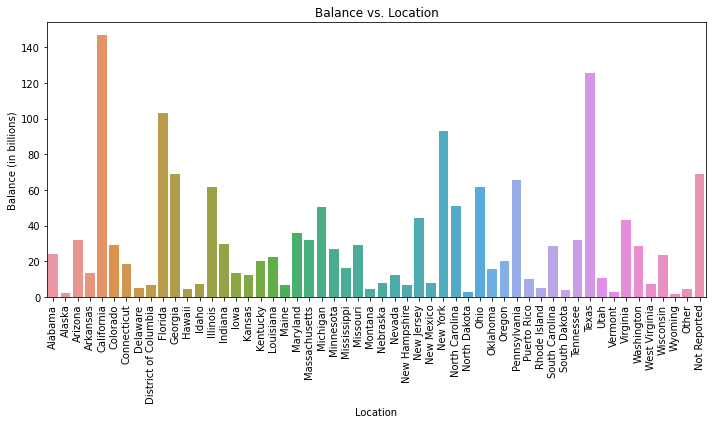

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Balance (in billions)', data=df)
plt.title('Balance vs. Location')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

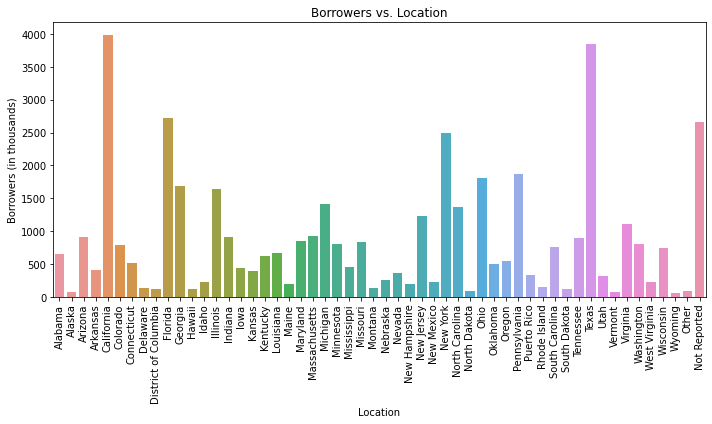

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Borrowers (in thousands)', data=df)
plt.title('Borrowers vs. Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

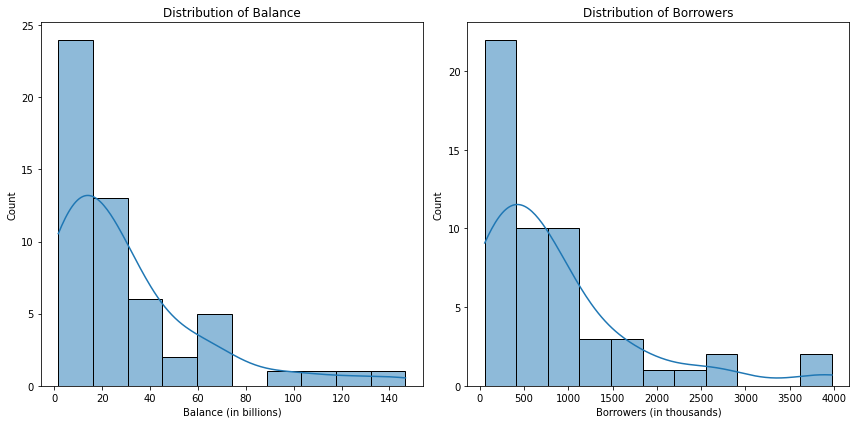

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Balance (in billions)'], kde=True)
plt.title('Distribution of Balance')

plt.subplot(1, 2, 2)
sns.histplot(df['Borrowers (in thousands)'], kde=True)
plt.title('Distribution of Borrowers')
plt.tight_layout()
plt.show()

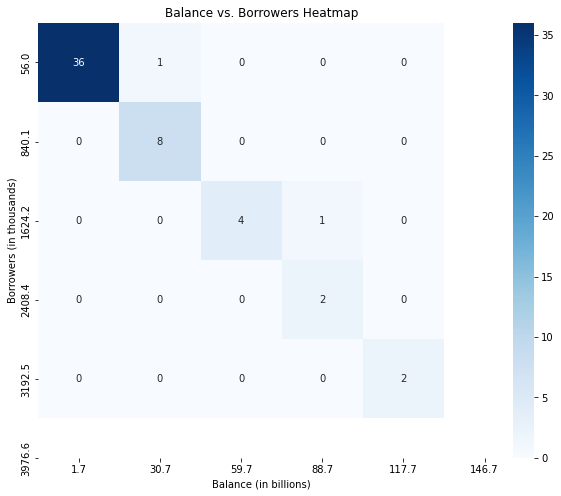

In [19]:
num_bins = 5
balance_bins = np.linspace(df['Balance (in billions)'].min(), df['Balance (in billions)'].max(), num_bins + 1)
borrowers_bins = np.linspace(df['Borrowers (in thousands)'].min(), df['Borrowers (in thousands)'].max(), num_bins + 1)

hist, _, _ = np.histogram2d(df['Balance (in billions)'], df['Borrowers (in thousands)'], bins=[balance_bins, borrowers_bins])

plt.figure(figsize=(10, 8))
sns.heatmap(hist, cmap='Blues', annot=True, fmt='g', xticklabels=balance_bins.round(1), yticklabels=borrowers_bins.round(1))
plt.title('Balance vs. Borrowers Heatmap')
plt.xlabel('Balance (in billions)')
plt.ylabel('Borrowers (in thousands)')
plt.show()

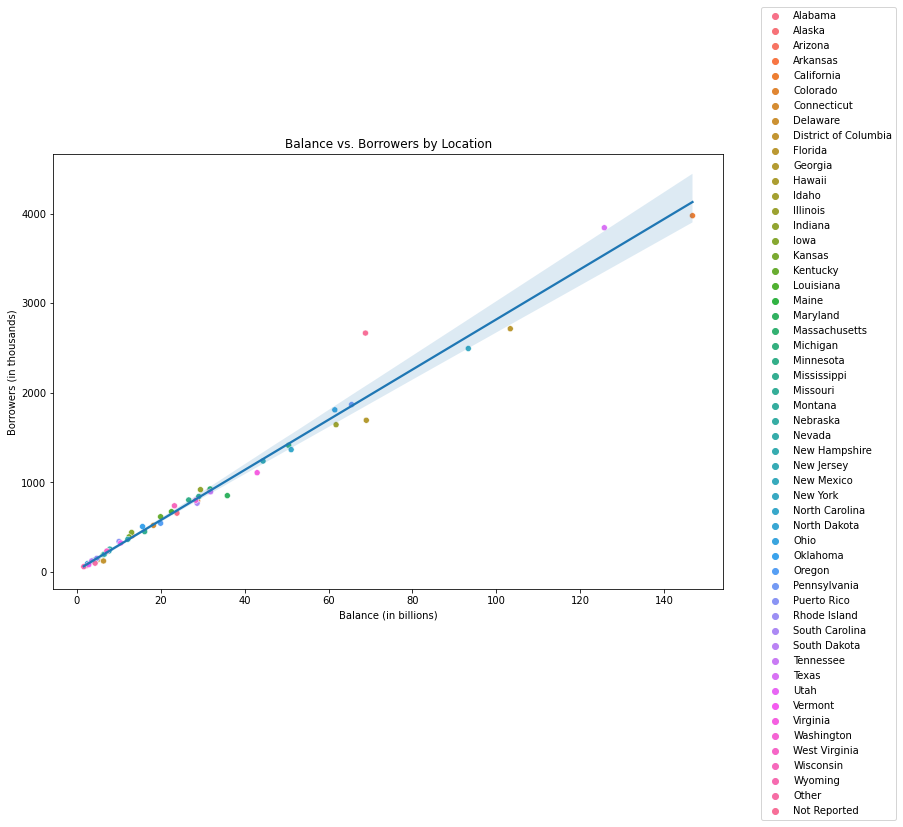

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Balance (in billions)', y='Borrowers (in thousands)', hue='Location', data=df)
sns.regplot(x='Balance (in billions)', y='Borrowers (in thousands)', data=df, scatter=False)
plt.title('Balance vs. Borrowers by Location')
plt.xlabel('Balance (in billions)')
plt.ylabel('Borrowers (in thousands)')
plt.legend(bbox_to_anchor=(1.05, 1.35), loc='upper left')
plt.show()


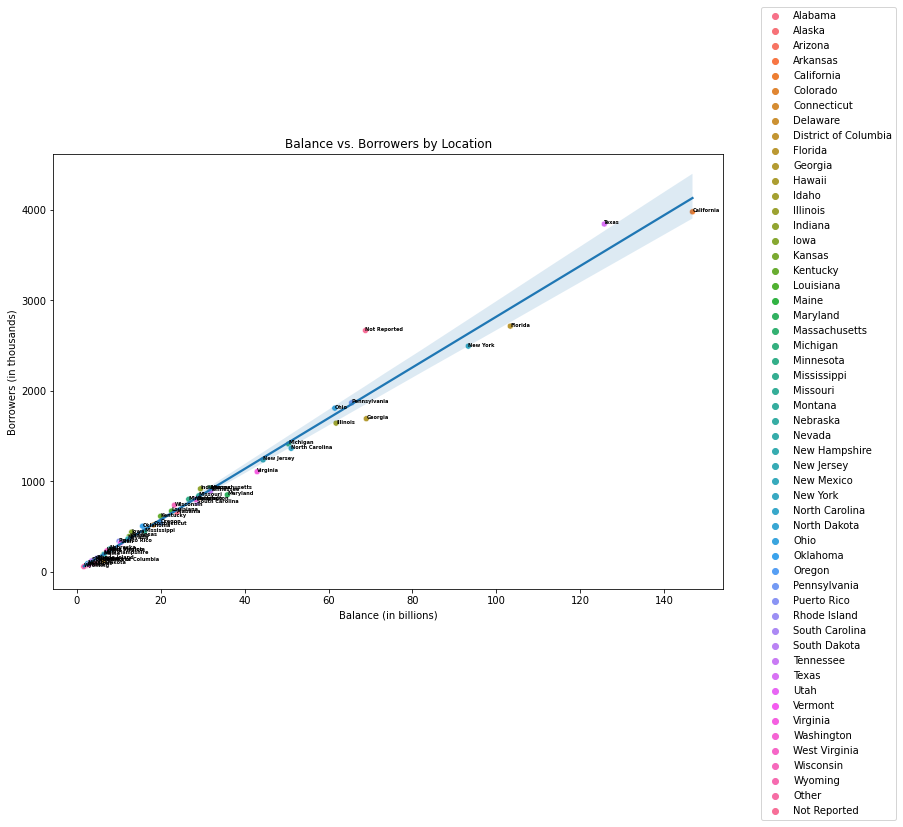

In [25]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='Balance (in billions)', y='Borrowers (in thousands)', hue='Location', data=df)
sns.regplot(x='Balance (in billions)', y='Borrowers (in thousands)', data=df, scatter=False)

# Adding loc names inside the plot
for line in range(0, df.shape[0]):
    scatter_plot.text(df['Balance (in billions)'][line], df['Borrowers (in thousands)'][line], 
                      df['Location'][line], horizontalalignment='left', fontsize=5, color='black', weight='semibold')

plt.title('Balance vs. Borrowers by Location')
plt.xlabel('Balance (in billions)')
plt.ylabel('Borrowers (in thousands)')
plt.legend(bbox_to_anchor=(1.05, 1.35), loc='upper left')
plt.show()
